In [1]:
#Note: Write script in Python 2 for this assignment.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd

### Problem 1. UserSim

In [3]:
def UserSim(n, my_lambda):
    sim = list(np.random.exponential(1/float(my_lambda), n)) 
    return sim

In [4]:
np.random.seed(123)
my_sim = UserSim(1000, 2)
my_cum = np.cumsum(my_sim)

In [5]:
# max(my_sim)

In [6]:
x = [0.25,0.5,0.75,1,
     1.25,1.5,1.75,2,2.25,2.5,2.75,3]

In [7]:
y = []
for i in x:
    num = np.sum(np.array(my_sim) >= i)
    y.append(num)

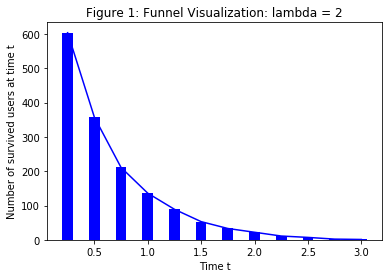

In [8]:
plt.bar(x, y, width =0.1, color='b')
plt.plot(x, y, color = 'b')
plt.title('Figure 1: Funnel Visualization: lambda = 2')
plt.xlabel('Time t')
plt.ylabel('Number of survived users at time t')
plt.show()

In [9]:
# plt.plot(x,y)
# plt.title('Funnel Visualization: lambda = 2')
# plt.show()

In [10]:
lambdas = list(np.round(np.arange(0.2,3.2,0.2),2))

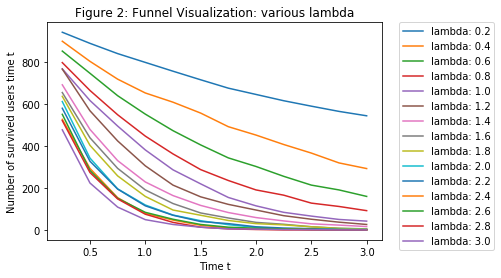

In [11]:
for l in lambdas:
    my_sim = UserSim(1000,l)
    y = []
    for i in x:
        num = np.sum(np.array(my_sim) >= i)
        y.append(num)
    plt.plot(x,y, label = 'lambda: {}'.format(l))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Figure 2: Funnel Visualization: various lambda')
plt.xlabel('Time t')
plt.ylabel('Number of survived users time t')
plt.show()

Survival time is the time a user stayed survive. 

- The bigger the $\lambda$ is, the steeper the slope is and the lower the line is in the gragh, which means less users are able to go through certain survival time threshold compared to that of lower $\lambda$'s.
- Under higher $\lambda$, with the increase of survival time threshold, the decline of number of users increases faster at the first, then slower down faster than that of lower $\lambda$'s.  

### Problem 2.  EstLam1

(a) Estimator being unbiased means it is equal to expected value.

(b) 

In [12]:
np.random.seed(321)
my_sim = UserSim(n=1000, my_lambda=1)

In [13]:
lambda_hat = 1/np.mean(np.array(my_sim))
lambda_hat

0.98761944786844991

(c) 

In [14]:
np.random.seed(321)
alpha = 0.05
lambda_hat = []
for i in range(500):
    lambda_hat.append(1/np.mean(np.random.choice(my_sim, len(my_sim))))
    
lower_bound = np.percentile(lambda_hat, alpha * 100)
upper_bound = np.percentile(lambda_hat, (1-alpha) * 100)

print lower_bound, upper_bound

0.9397255474 1.03901722469


(d)

In [15]:
user_list = [100, 200, 500, 1000, 2000, 5000, 10000]
lambda_hat_list = []
lower_bound_list = []
upper_bound_list = []

for n_user in user_list:
    np.random.seed(n_user) # set seed
    my_sim = UserSim(n=n_user, my_lambda=1) #create simulation list
    lambda_hat_list.append(1/np.mean(np.array(my_sim))) # 
    
    lambda_hat = []
    for i in range(500):
        lambda_hat.append(1/np.mean(np.random.choice(my_sim, len(my_sim))))
    
    lower_bound_list.append(np.percentile(lambda_hat, alpha * 100))
    upper_bound_list.append(np.percentile(lambda_hat, (1-alpha) * 100))

        

In [16]:
pd.DataFrame({'user_list': user_list, 'lambda_estimate': lambda_hat_list, 
              'lower_bound_95%': lower_bound_list, 'upper_bound_95%': upper_bound_list}, 
              columns = ['user_list', 'lambda_estimate', 'lower_bound_95%', 'upper_bound_95%'])

,user_list,lambda_estimate,lower_bound_95%,upper_bound_95%
0,100,1.060998,0.890115,1.277365
1,200,0.901073,0.804855,1.013709
2,500,0.981209,0.912712,1.059862
3,1000,0.996095,0.944705,1.050735
4,2000,0.967197,0.937204,1.002924
5,5000,0.990232,0.967040,1.013109
6,10000,1.007073,0.990463,1.023862


As number of users increases, confidence interval gets shrinked. It means estimate results get convergered.

##### Visulization 

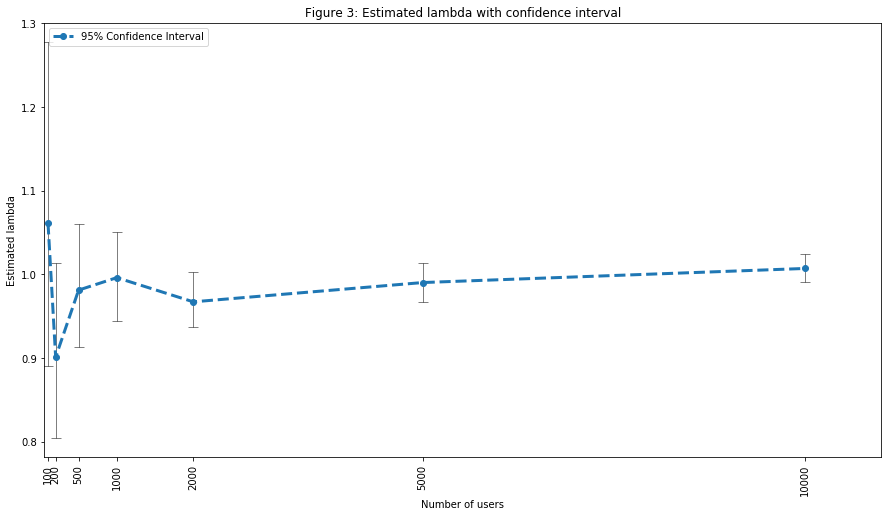

In [17]:
lower_error = np.array(lambda_hat_list) - np.array(lower_bound_list)
upper_error = np.array(upper_bound_list) - np.array(lambda_hat_list)
ci = [lower_error, upper_error]
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize = (15, 8))
line,caps,bars=plt.errorbar(
    user_list,     # X
    lambda_hat_list,    # Y
    yerr=ci,        # Y-errors
    fmt="o--",    # format line like for plot()
    linewidth=3,   # width of plot line
    elinewidth=0.5,# width of error bar line
    ecolor='k',    # color of error bar
    capsize=5,     # cap length for error bar
    capthick=0.5   # cap thickness for error bar
    )

plt.title('Figure 3: Estimated lambda with confidence interval')
plt.xlabel('Number of users')
plt.ylabel('Estimated lambda')

plt.setp(line,label="95% Confidence Interval")#give label to returned line
plt.legend(numpoints=1,             #Set the number of markers in label
           loc=('upper left'))      #Set label location
plt.xlim((50,11000))                 #Set X-axis limits
plt.xticks(user_list, rotation='vertical')               #get only ticks we want
plt.show()

### Problem 3. HurdleFun

In [18]:
np.random.seed(345)
my_sim_3 = UserSim(1000, 1)

In [19]:
break_point = [0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2, 2.25, 2.5, 2.75, 3]

In [20]:
# Input: my_sim_3, break_points
# Output: hould return a list of the number of users who fail to proceed beyond that break-point, 
# but did get to the previous break-point.
def HurdleFun(sim=my_sim_3, bp=break_point):
#def HurdleFun(sim, bp):
    user_steps = [] # number of steps that each user complete before exit
    output = []
    bp = np.array(bp)
    
    for user in sim: 
        user_steps.append((user-bp>0).sum())
    
    for i in range(len(bp)+1):
        output.append(sum(np.float64(i) == user_steps))
        
    return output

In [21]:
HurdleFun(my_sim_3, break_point)

[248, 184, 126, 95, 75, 48, 50, 38, 36, 33, 20, 8, 39]

In [22]:
HurdleFun(sim=[.20, .40], bp=[.25, .5])

[1, 1, 0]

a) 

Traditional MLE won't work because we do not know exactly when each user exit, we only know if a user is active at the end of each setp. So the data we have won't be continous, but be in groups. For each group the data point will be the same value. So the information we have is not continuous time length where each user quits, but how many users make to each event compared to other events. So we cannot use MLE here. 

b) write on paper


In [23]:
HurdleFun(sim=[.25, .45, .75], bp=[.5])

[2, 1]

### Problem  EstLam2

In [24]:
def F_exp(x, Lambda=1): return 1-np.exp(-Lambda*x)

In [25]:
print(HurdleFun(my_sim_3, break_point))
print(break_point)

[248, 184, 126, 95, 75, 48, 50, 38, 36, 33, 20, 8, 39]
[0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2, 2.25, 2.5, 2.75, 3]


In [55]:
def EstLam2(Hurdle_output, BP): 
    m = len(Hurdle_output)
    
    return lambda L: \
        Hurdle_output[0]*np.log(F_exp(BP[0], L))+\
        sum([Hurdle_output[i-1]*np.log(F_exp(BP[i-1], L)-F_exp(BP[i-2], L)) for i in range(2,m)])+\
        Hurdle_output[m-1]* (-L* BP[m-2]) # simplify formula to avoid "inf" value

In [46]:
x=[.25, .45, .75]
breaks=[.5]
PRT = EstLam2( HurdleFun(x, breaks), breaks)
PRT(1)

-2.3655042591343771

In [47]:
def MaxMLE(Hurdle_output, BP, lambda_list):
    max_mle = -float("Inf")
    lam = 0
    mle = EstLam2(Hurdle_output, BP)
    for l in list(np.arange(.1, 3, .05)):
        likelihood = mle(l)
        if likelihood > max_mle:
            max_mle = likelihood
            lam = l
    return lam

In [48]:
print MaxMLE( HurdleFun(x, breaks), breaks, list(np.arange(.1, 3, .05)))

2.2


4 a)

In [49]:
import matplotlib.pyplot as plt
%matplotlib inline

In [50]:
def sim_graph(niter= 1000, n=100, l =1 , bp = [.25, .75]):
    estlam1,estlam2=0,0
    diff = []
    for i in range(niter):
        my_sim = UserSim(n=n, my_lambda=l)
        est1 = 1/np.mean(np.array(my_sim))
        est2 = MaxMLE( HurdleFun(my_sim, bp), bp, list(np.arange(.1, 3, .05)))
        estlam1 += est1
        estlam2 += est2
        diff.append(abs(est1 - est2)) # calculate abs(diff)
    return np.mean(diff)

In [32]:
sim_graph(bp = [0.25, 0.75])

0.079450241205055047

In [33]:
sim_graph(bp = [0.25, 3])

0.066138824498787593

In [34]:
sim_graph(bp = [0.25, 10])

0.1461272526538874

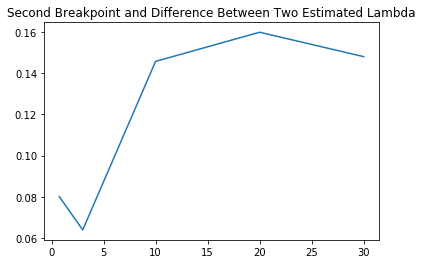

In [41]:
second = [0.75, 3, 10, 20, 30]
diff = []
for i in second:
    diff.append(sim_graph(bp=[0.25,i], l=1))

plt.plot(second, diff)
plt.title('Second Breakpoint and Difference Between Two Estimated Lambda')
plt.show()

From the plot, the further away the second breakpoint is from the first breakpoint, our two estimated lambdas are closer to each other on average, which means we get more precise estimation using the method. 

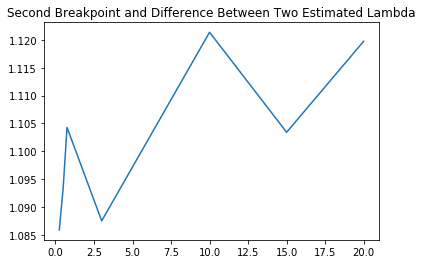

In [42]:
second = [0.25,0.5,0.75, 3, 10, 15, 20]
diff = []
for i in second:
    diff.append(sim_graph(bp=[0.1,i], l = 4))

plt.plot(second, diff)
plt.title('Second Breakpoint and Difference Between Two Estimated Lambda')
plt.show()

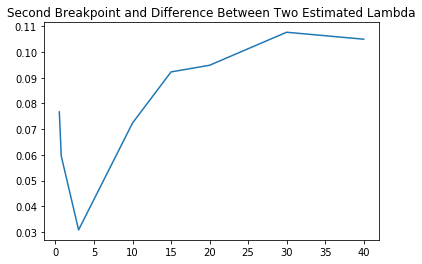

In [51]:
second = [0.5, 0.75, 3, 10, 15, 20, 30, 40]
diff = []
for i in second:
    diff.append(sim_graph(bp=[0.25,i], l = 0.5))
    
plt.plot(second, diff)
plt.title('Second Breakpoint and Difference Between Two Estimated Lambda')
plt.show()

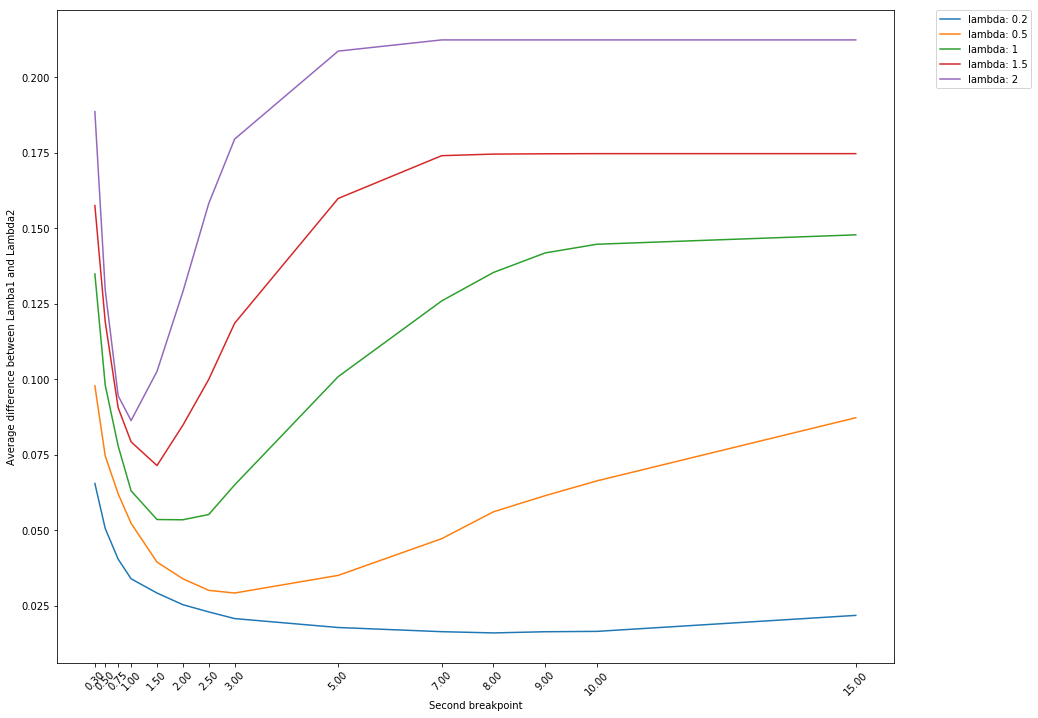

CPU times: user 2min 57s, sys: 610 ms, total: 2min 58s
Wall time: 2min 58s


In [52]:
%%time
plt.figure(figsize = (15, 12))

niter= 1000
n=100
second = [0.3, 0.5, 0.75, 1,1.5, 2,2.5, 3, 5, 7, 8,9,10, 15]
lambda_list = [0.2, 0.5, 1, 1.5, 2]
min_second_point = [] 

for my_lambda in lambda_list:

    acc = np.zeros(len(second))
    for i in range(niter):
        my_sim = UserSim(n=n, my_lambda= my_lambda)
        est1 = 1/np.mean(np.array(my_sim))
        
        diff_lamda =[]
        for i in second :
            diff_lamda.append( abs(MaxMLE(HurdleFun(my_sim, [0.25,i]), [0.25,i], list(np.arange(.1, 3, .05))) - est1))
        acc += np.array(diff_lamda)
        
    min_second_point.append(second[np.argmin(acc)])
    
    
    plt.xticks(second, rotation=45)
    plt.plot(second, acc/niter, label = 'lambda: {}'.format(my_lambda))
    plt.xlabel('Second breakpoint', font=20)
    plt.ylabel('Average difference between Lamba1 and Lambda2')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [53]:
result = pd.DataFrame({'lambda': lambda_list, 'Min_Diff_SEC_BP': min_second_point}, columns = ['lambda', 'Min_Diff_SEC_BP'])
result

,lambda,Min_Diff_SEC_BP
0,0.2,8.0
1,0.5,3.0
2,1.0,2.0
3,1.5,1.5
4,2.0,1.0
